In [1]:
# 读取wine数据集和wine_quality数据集
# 读取wine数据集 
import pandas as pd
wine = pd.read_csv('wine.csv',encoding='gb18030')
print('wine数据集的长度为：',len(wine))
print('wine_q数据集的前五行：\n',wine.head())

wine数据集的长度为： 178
wine_q数据集的前五行：
    Class  Alcohol  Malic_acid   Ash  Alcalinity_of_ash  Magnesium  \
0      1    14.23        1.71  2.43               15.6        127   
1      1    13.20        1.78  2.14               11.2        100   
2      1    13.16        2.36  2.67               18.6        101   
3      1    14.37        1.95  2.50               16.8        113   
4      1    13.24        2.59  2.87               21.0        118   

   Total_phenols  Flavanoids  Nonflavanoid_phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color_intensity   Hue  OD280/OD315_of_diluted_wines  Proline  
0             5.64  1.04                          3.92     

In [2]:
# 读取wine_quality数据集 
#读取.csv文件  sep=';'列与列之前用分开
wine_quality = pd.read_csv('wine_quality.csv',encoding='gb18030',sep=';')
print('wine_quality数据集的大小：',wine_quality.shape)
print('wine_quality数据集的前5行：\n',wine_quality.head()) 

wine_quality数据集的大小： (1599, 12)
wine_quality数据集的前5行：
    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4 

In [3]:
# wine数据集和wine_quality数据集拆分

# 拆分wine数据集
wine_data = wine.iloc[:,1:14]
wine_label = wine.iloc[:,0]
print('wine数据集的标签为：\n',wine_label)

wine数据集的标签为：
 0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Class, Length: 178, dtype: int64


In [4]:
# 拆分wine_quality数据集
wine_quality_data = wine_quality.iloc[:,0:11]
wine_quality_label = wine_quality.iloc[:,11]
print('wine_quality数据集的标签为：\n',wine_quality_label)

wine_quality数据集的标签为：
 0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64


In [5]:
# 对wine数据集和wine_quality数据集划分训练集、测试集

# 对wine数据集进行划分
from sklearn.model_selection import train_test_split
wine_train,wine_test,wine_train_label,wine_test_label = train_test_split\
(wine_data,wine_label,test_size=0.2, random_state=42)
wine_train_label.to_csv('wine_train_label.csv',index = False)
wine_test_label.to_csv('wine_test_label.csv',index = False)
print('wine原始数据集数据的形状为：',wine_data.shape)
print('wine训练集数据的形状为：',wine_train.shape)
print('wine训练集标签的形状为：',wine_train_label.shape)
print('wine测试集数据的形状为：',wine_test.shape)
print('wine测试集标签的形状为：',wine_test_label.shape)

wine原始数据集数据的形状为： (178, 13)
wine训练集数据的形状为： (142, 13)
wine训练集标签的形状为： (142,)
wine测试集数据的形状为： (36, 13)
wine测试集标签的形状为： (36,)


In [6]:
# 对wine_quality数据集进行划分
from sklearn.model_selection import train_test_split
wine_quality_train,wine_quality_test,wine_quality_train_label,wine_quality_test_label = \
train_test_split(wine_quality_data,wine_quality_label,test_size=0.2, random_state=42)
wine_quality_train_label.to_csv('wine_quality_train_label.csv',index = False)
wine_quality_test_label.to_csv('wine_quality_test_label.csv',index = False)
print('wine_quality原始数据集数据的形状为：',wine_quality_data.shape)
print('wine_quality训练集数据的形状为：',wine_quality_train.shape)
print('wine_quality训练集标签的形状为：',wine_quality_train_label.shape)
print('wine_quality测试集数据的形状为：',wine_quality_test.shape)
print('wine_quality测试集标签的形状为：',wine_quality_test_label.shape)

wine_quality原始数据集数据的形状为： (1599, 11)
wine_quality训练集数据的形状为： (1279, 11)
wine_quality训练集标签的形状为： (1279,)
wine_quality测试集数据的形状为： (320, 11)
wine_quality测试集标签的形状为： (320,)


In [7]:
# wine数据集和wine_quality数据集标准化

from sklearn.preprocessing import MinMaxScaler

# 标准化wine训练集
Scaler = MinMaxScaler().fit(wine_train)  # 生成规则
# 将规则应用于wine_quality训练集
wine_train_Scaler = Scaler.transform(wine_train)
# 将wine_train_Scaler转为DataFrame
wine_train_Scaler = pd.DataFrame(wine_train_Scaler)
# 重命名wine_train_Scaler
wine_train_Scaler.columns = wine_train.columns
wine_train_Scaler.to_csv('wine_train_Scaler.csv', index = False)
print('离差标准化后wine训练集前5行的数据为：\n',wine_train_Scaler.head())

离差标准化后wine训练集前5行的数据为：
     Alcohol  Malic_acid       Ash  Alcalinity_of_ash  Magnesium  \
0  0.871053    0.160896  0.716578           0.742268   0.304348   
1  0.394737    0.940937  0.684492           0.742268   0.282609   
2  0.352632    0.036660  0.395722           0.407216   0.195652   
3  0.644737    0.158859  0.684492           0.613402   0.206522   
4  0.536842    0.124236  0.395722           0.252577   0.304348   

   Total_phenols  Flavanoids  Nonflavanoid_phenols  Proanthocyanins  \
0       0.627586    0.204641              0.754717         0.721519   
1       0.279310    0.054852              0.943396         0.215190   
2       0.875862    0.719409              0.207547         0.484177   
3       0.558621    0.160338              0.735849         0.591772   
4       0.489655    0.485232              0.283019         0.300633   

   Color_intensity       Hue  OD280/OD315_of_diluted_wines   Proline  
0         1.000000  0.073171                      0.252747  0.301024  
1    

In [8]:
# 标准化wine测试集
Scaler = MinMaxScaler().fit(wine_test)  # 生成规则
# 将规则应用于wine_quality训练集
wine_test_Scaler = Scaler.transform(wine_test)
# 将wine_test_Scalerr转为DataFrame
wine_test_Scaler = pd.DataFrame(wine_test_Scaler)
# 重命wine_test_Scaler
wine_train_Scaler.columns = wine_test.columns
wine_test_Scaler.to_csv('wine_test_Scaler.csv', index = False)
print('离差标准化后wine测试集前5行的数据为：\n',wine_test_Scaler.head())

离差标准化后wine测试集前5行的数据为：
          0         1         2     3         4         5         6         7   \
0  0.771626  0.611399  0.741379  0.02  0.844444  0.692308  0.737609  0.000000   
1  0.968858  0.854922  0.637931  0.39  0.733333  0.769231  0.626822  0.282609   
2  0.525952  0.536269  0.862069  0.60  0.400000  0.097436  0.000000  0.782609   
3  0.802768  0.196891  0.862069  0.75  0.511111  0.846154  0.801749  0.260870   
4  0.332180  0.111399  0.189655  0.46  0.000000  0.389744  0.437318  0.217391   

         8         9         10        11        12  
0  0.600962  0.443156  0.527027  0.817460  0.383764  
1  0.403846  0.459397  0.405405  0.805556  0.557196  
2  0.163462  0.385151  0.270270  0.400794  0.202952  
3  0.947115  0.512761  0.837838  0.559524  0.708487  
4  0.302885  0.394432  0.743243  0.865079  0.136531  


In [9]:
# 标准化wine_quality训练集
Scaler = MinMaxScaler().fit(wine_quality_train)  # 生成规则
# 将规则应用于wine_quality训练集
wine_quality_train_Scaler = Scaler.transform(wine_quality_train)
print('离差标准化后wine_quality训练集前5行的数据为：\n',
      wine_quality_train_Scaler[0:5,:])
# 标准化wine_quality测试集
Scaler = MinMaxScaler().fit(wine_quality_test)  # 生成规则
# 将规则应用于wine_quality训练集
wine_quality_test_Scaler = Scaler.transform(wine_quality_test)
print('离差标准化后wine_quality测试集前5行的数据为：\n',
      wine_quality_test_Scaler[0:5,:])

离差标准化后wine_quality训练集前5行的数据为：
 [[0.36283186 0.39041096 0.31       0.14383562 0.12353923 0.32835821
  0.26501767 0.74375918 0.58267717 0.22699387 0.49230769]
 [0.13274336 0.06164384 0.4        0.03424658 0.09015025 0.58955224
  0.56183746 0.08296623 0.4015748  0.13496933 0.53846154]
 [0.55752212 0.18493151 0.47       0.06164384 0.1769616  0.07462687
  0.02826855 0.5969163  0.44094488 0.23312883 0.21538462]
 [0.37168142 0.3869863  0.26       0.04794521 0.12687813 0.2238806
  0.06007067 0.50440529 0.45669291 0.06134969 0.15384615]
 [0.33628319 0.62671233 0.15       0.34931507 0.10183639 0.14925373
  0.16961131 0.65565345 0.49606299 0.07361963 0.23076923]]
离差标准化后wine_quality测试集前5行的数据为：
 [[0.25714286 0.44221106 0.10126582 0.10655738 0.19582245 0.18309859
  0.14391144 0.51012146 0.33043478 0.32038835 0.21428571]
 [0.26666667 0.38190955 0.21518987 0.03278689 0.11227154 0.28169014
  0.35055351 0.42105263 0.46086957 0.14563107 0.19642857]
 [0.54285714 0.55276382 0.27848101 0.12295082 0.17754569

In [10]:
# 对wine数据集和wine_quality数据集降维


from sklearn.decomposition import PCA

# 对wine_quality训练集进行降维
wine_quality_pca_model = PCA(n_components=8).fit(wine_quality_train)  # 生成规则
wine_quality_trainPca = wine_quality_pca_model.transform(wine_quality_train)  # 将规则应用于训练集
# 将wine_quality_trainPca转为DataFrame
wine_quality_trainPca = pd.DataFrame(wine_quality_trainPca)
wine_quality_trainPca.to_csv('wine_quality_trainPca.csv', index = False)
print('PCA降维前wine_quality训练集数据的形状为：',wine_quality_train.shape)
print('PCA降维后wine_quality训练集数据的形状为：',wine_quality_trainPca.shape)

# 对wine_quality测试集进行降维
wine_quality_testPca = wine_quality_pca_model.transform(wine_quality_test)  # 将规则应用于测试集
# 将wine_quality_testPca转为DataFrame
wine_quality_testPca = pd.DataFrame(wine_quality_testPca)
wine_quality_testPca.to_csv('wine_quality_testPca.csv', index = False)
print('PCA降维前wine_quality测试集数据的形状为：',wine_quality_test.shape)
print('PCA降维后wine_quality测试集数据的形状为：',wine_quality_testPca.shape)

PCA降维前wine_quality训练集数据的形状为： (1279, 11)
PCA降维后wine_quality训练集数据的形状为： (1279, 8)
PCA降维前wine_quality测试集数据的形状为： (320, 11)
PCA降维后wine_quality测试集数据的形状为： (320, 8)


聚类

In [14]:
# 数据预处理及K-Means模型构建

import pandas as pd
from sklearn.cluster import KMeans  #导入分类器库

# 读取训练集数据
wine_train_Scaler = pd.read_csv('wine_train_Scaler.csv')
wine_train_label = pd.read_csv('wine_train_label.csv',header = None)
wine_train_label.columns = ['label']  # 重命名列名
# 构建并训练模型
kmeans = KMeans(n_clusters = 3,random_state=123).fit(wine_train_Scaler)
print('构建k-means模型为：\n',kmeans)

构建k-means模型为：
 KMeans(n_clusters=3, random_state=123)


In [15]:
# 模型评价
# 导入FMI方法的评价函数
from sklearn.metrics import fowlkes_mallows_score 
# kmeans = KMeans(n_clusters= 3).fit(wine_train_Scaler)
# score = fowlkes_mallows_score(wine_train_label['label'].tolist(),kmeans.labels_)
# print('wine数据集的类中心为3时，其FMI的评价分值为：%f'%score)

wine数据集的类中心为3时，其FMI的评价分值为：0.914722


In [16]:
for i in range(2,11):
    ##构建并训练模型
    kmeans = KMeans(n_clusters = i,random_state=123).fit(wine_train_Scaler)
    score = fowlkes_mallows_score(wine_train_label['label'],kmeans.labels_)
    print('wine数据聚%d类FMI评价分值为：%f' %(i,score))

wine数据聚2类FMI评价分值为：0.637271
wine数据聚3类FMI评价分值为：0.901579
wine数据聚4类FMI评价分值为：0.809973
wine数据聚5类FMI评价分值为：0.750412
wine数据聚6类FMI评价分值为：0.715938
wine数据聚7类FMI评价分值为：0.686684
wine数据聚8类FMI评价分值为：0.597405
wine数据聚9类FMI评价分值为：0.576837
wine数据聚10类FMI评价分值为：0.521399


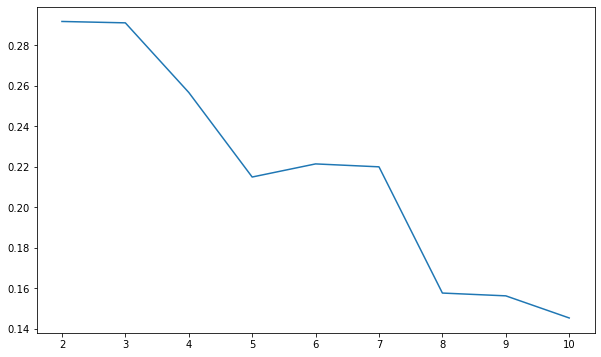

In [17]:
# 轮廓系数评估KMeans模型
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
silhouettteScore = []
for i in range(2,11):
    kmeans = KMeans(n_clusters = i,random_state=123).fit(wine_train_Scaler)
    score = silhouette_score(wine_train_Scaler,kmeans.labels_)
    silhouettteScore.append(score)
plt.figure(figsize=(10,6))
plt.plot(range(2,11),silhouettteScore,linewidth=1.5, linestyle="-")
plt.show()

In [26]:
# 使用Calinski-Harabasz指数评价K-Means聚类
from sklearn.metrics import calinski_harabasz_score
for i in range(2,11):
    ##构建并训练模型
    kmeans = KMeans(n_clusters = i,random_state=1).fit(wine_train_Scaler)
    score = calinski_harabasz_score(wine_train_Scaler,kmeans.labels_)
    print('wine数据聚%d类calinski_harabaz指数为：%f'%(i,score))

wine数据聚2类calinski_harabaz指数为：66.205572
wine数据聚3类calinski_harabaz指数为：63.741486
wine数据聚4类calinski_harabaz指数为：51.314585
wine数据聚5类calinski_harabaz指数为：42.489848
wine数据聚6类calinski_harabaz指数为：37.955786
wine数据聚7类calinski_harabaz指数为：34.531331
wine数据聚8类calinski_harabaz指数为：32.026136
wine数据聚9类calinski_harabaz指数为：29.439804
wine数据聚10类calinski_harabaz指数为：28.451751


分类

In [23]:
# 建立SVM模型
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import classification_report   # 预测报告

train_Scaler = pd.read_csv('wine_train_Scaler.csv')
wine_target_train = pd.read_csv('wine_train_label.csv',header = None)
test_Scaler = pd.read_csv('wine_test_Scaler.csv')
wine_target_test = pd.read_csv('wine_test_label.csv',header = None)
print('训练集形状：',train_Scaler.shape,'\n',
      '训练集标签形状：',wine_target_train.shape,'\n',
      '测试集形状',test_Scaler.shape,'\n',
      '测试集标签形状',wine_target_test.shape)
# 构建SVM模型，并预测测试集结果。
svm = SVC().fit(train_Scaler,wine_target_train)
print('建立的SVM模型为：\n',svm)

训练集形状： (142, 13) 
 训练集标签形状： (142, 1) 
 测试集形状 (36, 13) 
 测试集标签形状 (36, 1)
建立的SVM模型为：
 SVC()


/Users/ruohaoli/opt/anaconda3/envs/Data_Analysis/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [24]:
# 建立SVM模型
wine_target_pred = svm.predict(test_Scaler)
print('测试集的预测结果为：\n',wine_target_pred)

测试集的预测结果为：
 [1 1 3 2 2 1 2 3 2 3 1 3 1 2 1 2 2 2 1 2 2 2 2 3 3 3 2 2 2 2 1 2 3 1 1 1]


In [25]:
# 模型评估
print('SVM模型分类报告：\n',classification_report(wine_target_test,wine_target_pred))

SVM模型分类报告：
               precision    recall  f1-score   support

           1       1.00      0.79      0.88        14
           2       0.82      1.00      0.90        14
           3       1.00      1.00      1.00         8

    accuracy                           0.92        36
   macro avg       0.94      0.93      0.93        36
weighted avg       0.93      0.92      0.92        36

